<div style="position: relative; text-align: center;">

  <h1 style="
        position: absolute;
        top: 20%;
        left:2%;
        transform: translate(-50%, -50%);
        margin: 0;
        color: white;
        font-size: 40px;
        font-weight: bold;
      text-shadow: 
            2px 2px 0px black,
            4px 4px 4px #000000aa,
            6px 6px 8px #00000055;
    ">
    Airline Flight Delay Prediction and Analysis
  </h1>

  <img src="https://www.shutterstock.com/image-vector/digital-3d-airplane-abstract-vector-600nw-1950131554.jpg"
        style= "width: 980px;
        height: 100px;
        object-fit: cover;
        border-radius: 12px;">
  >
</div>



<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Introduction
</div>


<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
Airline delays affect millions of passengers every year and create huge financial losses for airlines. Predicting delays in advance helps airlines improve scheduling, reduce customer inconvenience, and optimize resources. This project analyzes real U.S. flight data that includes airports, weather conditions, travel routes, aircraft information, and delay times. The dataset is large and unclean, making it suitable for real-world data cleaning and analysis. The goal is to find the main reasons behind flight delays and build a model that predicts whether a flight will be delayed.
</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇  Problem Statement
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">

Airlines struggle to accurately identify which flights will face delays because delays depend on many factors such as weather, airport congestion, distance, and airline operations. The challenge is to analyze large volumes of real, unclean aviation data and predict delays using meaningful patterns.
</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Aim of the Project
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
To analyze and predict airline flight delays using real-world aviation data through data cleaning, feature engineering, exploratory analysis, and predictive modeling.
</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Objectives of the Project
</div>


<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">
<li>Clean and preprocess the unclean flight dataset.</li>
<li>Analyze delay patterns based on airline, airport, route, and time.</li>
<li>Identify major factors influencing delays.</li>
<li>Build a predictive model to classify whether a flight will be delayed.</li>
<li>Provide insights that can help airlines reduce delays.</li>
</ul>
</div>


<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Scope of Project
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">
    
The scope of this project includes data cleaning, analysis, and machine learning modeling of airline flight data to understand delay patterns and predict future delays. It covers handling unclean data, exploring delay trends, identifying major delay factors, creating new features, building predictive models, and providing insights that can help airlines reduce delays. The project focuses only on historical data analysis and does not include real-time prediction or system deployment.
</ul>
</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Dataset Description
</div>


<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

The project uses three CSV files:

<li>airlines.csv</li>
<li>airports.csv</li>
<li>flights.csv</li>

Important columns include:

<li>FLIGHT_DATE </li>
<li>AIRLINE → Airline name</li>
<li>ORIGIN, DEST → Airports</li>
<li>DISTANCE → Flight distance</li>
<li>DEPARTURE_DELAY</li>
<li>ARRIVAL_DELAY</li>
<li>TAXI_IN, TAXI_OUT</li>
<li>SCHEDULED_DEPARTURE</li>
<li>ACTUAL_DEPARTURE</li>
</ul>
</div>



<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Methodology
</div>

<div style="color:#003366; font-size:20px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Import Libraries
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


# Load lookup tables (small files)
airline_df = pd.read_csv(r"F:\project-airline delay\airlines.csv")
airport_df = pd.read_csv(r"F:\project-airline delay\airports.csv")

# Reduce file size by keeping only non-cancelled flights

input_file = r"F:\project-airline delay\flights.csv"
output_file = r"F:\project-airline delay\flights_clean.csv"

chunksize = 200000

with open(output_file, "w", newline="", encoding="utf-8") as out:
    first_chunk = True
    for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):
        cleaned = chunk[chunk["CANCELLED"] == 0]
        cleaned.to_csv(out, index=False, header=first_chunk)
        first_chunk = False

print("Cleaned file saved as:", output_file)



Cleaned file saved as: F:\project-airline delay\flights_clean.csv


<div style="color:#003366; font-size:20px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Merge Dataset
</div>

In [7]:
cleaned_df = pd.read_csv(output_file)

C:\Users\asish\AppData\Local\Temp\ipykernel_21412\4222159099.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(output_file)


In [8]:
# check the number of datas
print(airline_df.shape)
print(airport_df.shape)

print(cleaned_df.shape)


(14, 2)
(322, 7)
(5729195, 31)


In [9]:
airline_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [10]:
airport_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [12]:
cleaned_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# merge the two datasets 
df = cleaned_df.merge(airline_df, how='left', on='AIRLINE')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df.merge(airport_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [15]:
df = df.merge(airport_df, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [16]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE_x', 'IATA_CODE_y',
       'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'IATA_CODE', 'AIRPORT_y', 'CITY_y', 'STATE_y',
       'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 46 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24



<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Data CleaningAnalysis
</div>

In [62]:
df.describe()

,YEAR,MONTH,DAY,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,FLIGHT_DATE,DEPARTURE_HOUR,TOTAL_TAXI_TIME,DELAY_FLAG
count,5727817.0,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,...,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5.727817e+06,5727817.0,5727817,5.727817e+06,5.727817e+06,5.727817e+06
mean,2015.0,6.547551e+00,1.570839e+01,2.164789e+03,1.328909e+03,1.335102e+03,9.139154e+00,1.607049e+01,1.357143e+03,1.419415e+02,...,7.433871e+00,1.493332e+03,1.475862e+03,4.197807e+00,2.648653e-03,0.0,2015-07-02 14:54:27.065410048,1.304920e+01,2.350436e+01,1.784518e-01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.600000e+01,1.000000e+00,1.000000e+00,1.800000e+01,...,1.000000e+00,1.000000e+00,0.000000e+00,-8.700000e+01,0.000000e+00,0.0,2015-01-01 00:00:00,0.000000e+00,2.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.600000e+01,...,4.000000e+00,1.110000e+03,1.058000e+03,-1.300000e+01,0.000000e+00,0.0,2015-04-05 00:00:00,9.000000e+00,1.700000e+01,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,...,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.0,2015-07-03 00:00:00,1.300000e+01,2.100000e+01,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,3.212000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.740000e+02,...,9.000000e+00,1.917000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.0,2015-09-30 00:00:00,1.700000e+01,2.700000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,9.320000e+03,2.359000e+03,2.400000e+03,6.000000e+02,2.250000e+02,2.400000e+03,7.180000e+02,...,2.480000e+02,2.400000e+03,2.400000e+03,6.980000e+02,1.000000e+00,0.0,2015-12-31 00:00:00,2.400000e+01,2.680000e+02,1.000000e+00
std,0.0,3.396988e+00,8.774647e+00,1.754956e+03,4.834490e+02,4.963512e+02,3.452161e+01,8.893425e+00,4.979581e+02,7.532915e+01,...,5.636915e+00,5.068174e+02,5.270932e+02,3.692005e+01,5.139687e-02,0.0,NaN,4.974084e+00,1.054449e+01,3.828926e-01


<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Missing Value Analysis
</div>


In [18]:
# checking missing values
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               1
ELAPSED_TIME             15187
AIR_TIME                 15187
DISTANCE                     0
WHEELS_ON                 2629
TAXI_IN                   2629
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              2629
ARRIVAL_DELAY            15187
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4665756
SECURITY_DELAY         4665756
AIRLINE_DELAY          4665756
LATE_AIRCRAFT_DELAY    4665756
WEATHER_DELAY          4665756
IATA_CODE_x            5729195
IATA_COD

In [19]:
# Check how many null values each column has before deciding which columns to remove.

(df.isnull().sum() / len(df)) * 100

YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
DAY_OF_WEEK              0.000000
AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
TAIL_NUMBER              0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.000017
ELAPSED_TIME             0.265081
AIR_TIME                 0.265081
DISTANCE                 0.000000
WHEELS_ON                0.045888
TAXI_IN                  0.045888
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME             0.045888
ARRIVAL_DELAY            0.265081
DIVERTED                 0.000000
CANCELLED                0.000000
CANCELLATION_REASON    100.000000
AIR_SYSTEM_DELAY        81.438247
SECURITY_DELAY          81.438247
AIRLINE_DELAY           81.438247
LATE_AIRCRAFT_

In [20]:
# The missing values are very high, so we cannot accurately predict the results. Also, some unused columns contain airport details such as city and state etc.
drop_cols = [
    'CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
    'IATA_CODE_x','IATA_CODE_y','IATA_CODE',
    'AIRPORT_x','AIRPORT_y',
    'CITY_x','CITY_y',
    'STATE_x','STATE_y',
    'COUNTRY_x','COUNTRY_y',
    'LATITUDE_x','LATITUDE_y',
    'LONGITUDE_x','LONGITUDE_y'
]
#df = df.drop(columns=[col for col in drop_cols if col in df.columns])

df.drop(columns=drop_cols, inplace=True, errors='ignore')
df.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

In [21]:
# Filling missing values with 'unknown'

df['TAIL_NUMBER'] = df['TAIL_NUMBER'].fillna("Unknown")

df['TAIL_NUMBER'].value_counts()

TAIL_NUMBER
N480HA    3766
N484HA    3723
N488HA    3721
N493HA    3584
N478HA    3577
          ... 
N860NW       1
N840MH       1
N175UA       1
N180UA       1
N7LBAA       1
Name: count, Length: 4896, dtype: int64

In [22]:
# filling the missing values with median
median_cols = ['TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN']
df[median_cols] = df[median_cols].fillna(df[median_cols].median())

df[['TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN']].isna().sum()      
#(df[['TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN']] == 0).sum()  

TAXI_OUT        0
ELAPSED_TIME    0
AIR_TIME        0
TAXI_IN         0
dtype: int64

In [24]:
# filling the missing values

missing_cols = [ 'DEPARTURE_TIME','DEPARTURE_DELAY','WHEELS_OFF','WHEELS_ON','ARRIVAL_TIME','ARRIVAL_DELAY']
df[missing_cols ]= df[missing_cols ].fillna(0)

df[ [ 'DEPARTURE_TIME','DEPARTURE_DELAY','WHEELS_OFF','WHEELS_ON','ARRIVAL_TIME','ARRIVAL_DELAY']].isna().sum() 

DEPARTURE_TIME     0
DEPARTURE_DELAY    0
WHEELS_OFF         0
WHEELS_ON          0
ARRIVAL_TIME       0
ARRIVAL_DELAY      0
dtype: int64

In [26]:
df['SCHEDULED_TIME'] = df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].median())
print(df['SCHEDULED_TIME'].isna().sum())


0


In [27]:
# recheck the missing values

df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Duplicate Value Analysis
</div>


In [28]:
# checking duplicate values

df.duplicated().sum()

np.int64(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Removing Unwanted Spaces
</div>

In [30]:
# Remove unwanted spaces
string_cols = df.select_dtypes(include='object').columns

for col in string_cols:
    df[col] = df[col].apply(lambda x: str(x).strip().replace('  ', ' '))

(df['AIRLINE'].unique())

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Data Type Conversion
</div>

In [31]:
# change datatypes

dtype_cols = ['TAIL_NUMBER','AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df[dtype_cols] = df[dtype_cols].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              string 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          string 
 7   ORIGIN_AIRPORT       string 
 8   DESTINATION_AIRPORT  string 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24


<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Creating a Date Column from Year, Month, and Day
</div>


In [32]:
# Creating a date column by merging Year, Month, and Day

df['FLIGHT_DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df['FLIGHT_DATE']
#df['FLIGHT_DATE'].dtype

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5729190   2015-12-31
5729191   2015-12-31
5729192   2015-12-31
5729193   2015-12-31
5729194   2015-12-31
Name: FLIGHT_DATE, Length: 5729195, dtype: datetime64[ns]

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Outlier Detection
</div>



In [33]:
# checking outliers

(df['AIR_TIME'] < 0).sum()

np.int64(0)

In [34]:
dep_outliers = df[(df['DEPARTURE_DELAY'] < -60) | (df['DEPARTURE_DELAY'] > 600)]
print("Number of DEPARTURE_DELAY outliers:", dep_outliers.shape[0])


Number of DEPARTURE_DELAY outliers: 1378


In [39]:
df = df[(df['DEPARTURE_DELAY'] >= -60) & (df['DEPARTURE_DELAY'] <= 600)]

dep_outliers = df[(df['DEPARTURE_DELAY'] < -60) | (df['DEPARTURE_DELAY'] > 600)]
print("Outliers after fixing:", dep_outliers.shape[0])



Outliers after fixing: 0


In [36]:
arr_outliers = df[(df['ARRIVAL_DELAY'] < -60) | (df['ARRIVAL_DELAY'] > 600)]
print("Number of ARRIVAL_DELAY outliers:", arr_outliers.shape[0])

Number of ARRIVAL_DELAY outliers: 1740


In [40]:
# remove outliers from arrival delay
arr_outliers = df[(df['ARRIVAL_DELAY'] < -60) & (df['ARRIVAL_DELAY'] > 600)]
print("Number of ARRIVAL_DELAY outliers:", arr_outliers.shape[0])

Number of ARRIVAL_DELAY outliers: 0


In [64]:
# checking outliers in taxi_out,taxi_in & elapsed_time

taxi_outliers = df[(df['TAXI_OUT'] > 60) | (df['TAXI_OUT'] < 0)]
taxi_in_outliers = df[(df['TAXI_IN'] > 60) | (df['TAXI_IN'] < 0)]
elapsed_outliers = df[(df['ELAPSED_TIME'] > 700) | (df['ELAPSED_TIME'] < 0)]

print("TAXI_OUT outliers:", taxi_outliers.shape[0])
print("TAXI_IN outliers:", taxi_in_outliers.shape[0])
print("ELAPSED_TIME outliers:", elapsed_outliers.shape[0])



TAXI_OUT outliers: 28723
TAXI_IN outliers: 4950
ELAPSED_TIME outliers: 41


In [42]:
# remove outliers from  taxi_out,taxi_in & elapsed_time

taxi_outliers = df[(df['TAXI_OUT'] > 60) & (df['TAXI_OUT'] < 0)]
taxi_in_outliers = df[(df['TAXI_IN'] > 60) & (df['TAXI_IN'] < 0)]
elapsed_outliers = df[(df['ELAPSED_TIME'] >700) & (df['ELAPSED_TIME'] < 0)]

print("TAXI_OUT outliers:", taxi_outliers.shape[0])
print("TAXI_IN outliers:", taxi_in_outliers.shape[0])
print("ELAPSED_TIME outliers:", elapsed_outliers.shape[0])


TAXI_OUT outliers: 0
TAXI_IN outliers: 0
ELAPSED_TIME outliers: 0


In [43]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,FLIGHT_DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01



<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ EDA(Exploratory Data Analysis)
</div>

In [44]:
# These help to identify patterns over time
df['YEAR'] = df['FLIGHT_DATE'].dt.year
df['MONTH'] = df['FLIGHT_DATE'].dt.month
df['DAY'] = df['FLIGHT_DATE'].dt.day
df['DAY_OF_WEEK'] = df['FLIGHT_DATE'].dt.day_name()
df['MONTH_NAME'] = df['FLIGHT_DATE'].dt.month_name()

df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'MONTH_NAME']]

,YEAR,MONTH,DAY,DAY_OF_WEEK,MONTH_NAME
0,2015,1,1,Thursday,January
1,2015,1,1,Thursday,January
2,2015,1,1,Thursday,January
3,2015,1,1,Thursday,January
4,2015,1,1,Thursday,January
...,...,...,...,...,...
5729190,2015,12,31,Thursday,December
5729191,2015,12,31,Thursday,December
5729192,2015,12,31,Thursday,December
5729193,2015,12,31,Thursday,December


In [74]:
#Average delay by month
avg_delay_month = df.groupby('MONTH_NAME')['DEPARTURE_DELAY'].mean()
print(avg_delay_month)

#Average delay by day of week
avg_delay_day = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
print(avg_delay_day)

#Average delay by year
avg_delay_year = df.groupby('YEAR')['DEPARTURE_DELAY'].mean()
print(avg_delay_year)


MONTH_NAME
April         7.528372
August        9.744120
December     11.425136
February     11.534590
January       9.549554
July         11.242141
June         13.669289
March         9.420502
May           9.213939
November      6.729555
October       4.817838
September     4.666967
Name: DEPARTURE_DELAY, dtype: float64
DAY_OF_WEEK
Friday        9.241028
Monday       10.566266
Saturday      7.556936
Sunday        9.144099
Thursday      9.736459
Tuesday       8.969483
Wednesday     8.459400
Name: DEPARTURE_DELAY, dtype: float64
YEAR
2015    9.139154
Name: DEPARTURE_DELAY, dtype: float64


In [47]:
# Extract hours from DEPARTURE_TIME.its help to understand when delays happen.

df['DEPARTURE_HOUR'] = (df['DEPARTURE_TIME'] // 100).astype(int)
df[['DEPARTURE_TIME', 'DEPARTURE_HOUR']].head()


,DEPARTURE_TIME,DEPARTURE_HOUR
0,2354.0,23
1,2.0,0
2,18.0,0
3,15.0,0
4,24.0,0


In [69]:
# Average delay per hour
avg_delay_per_hour = df.groupby('DEPARTURE_HOUR')['DEPARTURE_DELAY'].mean()

print(avg_delay_per_hour)


DEPARTURE_HOUR
0     50.726958
1     65.180538
2     85.509309
3     69.997243
4     -2.036117
5     -3.705601
6     -1.923875
7      0.060795
8      1.771878
9      3.891901
10     4.908955
11     6.423762
12     7.632732
13     8.437413
14    10.133936
15    10.331104
16    11.551610
17    11.270934
18    14.085193
19    14.900774
20    19.131882
21    22.675343
22    28.110208
23    43.031282
24    57.405088
Name: DEPARTURE_DELAY, dtype: float64


In [48]:
# its help to understand that Airline delays are strongly related to the time of day.
 
def part_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['PART_OF_DAY'] = df['DEPARTURE_HOUR'].apply(part_of_day)

df['PART_OF_DAY'].value_counts()



PART_OF_DAY
Morning      1960439
Afternoon    1699123
Evening      1280809
Night         787446
Name: count, dtype: int64

In [76]:
avg_delay_part = df.groupby('PART_OF_DAY')['DEPARTURE_DELAY'].mean()
avg_delay_part = avg_delay_part.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
print(avg_delay_part)


PART_OF_DAY
Morning       1.171520
Afternoon     9.597064
Evening      14.532457
Night        19.215051
Name: DEPARTURE_DELAY, dtype: float64


In [49]:
# Helps to understand and find the busiest flight routes.

df['ROUTE'] = df['ORIGIN_AIRPORT'] + " → " + df['DESTINATION_AIRPORT']
df['ROUTE'].head()


0    ANC → SEA
1    LAX → PBI
2    SFO → CLT
3    LAX → MIA
4    SEA → ANC
Name: ROUTE, dtype: string

In [78]:
#Average delay per route
avg_delay_route = df.groupby('ROUTE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
print(avg_delay_route.head(10))  # Top 10 routes with highest average delay


ROUTE
IAD → TTN        341.000000
SWF → PBI        256.000000
RDU → IND        209.000000
SGF → HYS        206.000000
CRP → HRL        206.000000
RIC → CAE        190.000000
FSD → LNK        166.000000
SWF → RSW        153.000000
MSO → BTM        151.000000
10581 → 12953    147.333333
Name: DEPARTURE_DELAY, dtype: float64


In [79]:
# Number of flights per route (to find busiest routes)
flight_count_route = df['ROUTE'].value_counts().head(10)
print(flight_count_route)


ROUTE
SFO → LAX    13405
LAX → SFO    13113
JFK → LAX    11874
LAX → JFK    11864
LAS → LAX     9648
LAX → LAS     9527
LGA → ORD     9204
ORD → LGA     9167
JFK → SFO     8322
SFO → JFK     8320
Name: count, dtype: Int64


In [80]:
#Combine both: Delay vs Traffic
top_routes = df.groupby('ROUTE').agg({
    'DEPARTURE_DELAY':'mean',
    'FLIGHT_NUMBER':'count'  # or any column to count flights
}).rename(columns={'FLIGHT_NUMBER':'Num_Flights'}).sort_values(by='Num_Flights', ascending=False).head(10)

print(top_routes)


           DEPARTURE_DELAY  Num_Flights
ROUTE                                  
SFO → LAX        12.532712        13405
LAX → SFO        13.939297        13113
JFK → LAX         7.821374        11874
LAX → JFK        10.216453        11864
LAS → LAX        10.783582         9648
LAX → LAS        11.093944         9527
LGA → ORD        12.205671         9204
ORD → LGA        16.052253         9167
JFK → SFO         9.776256         8322
SFO → JFK        12.121875         8320


In [50]:
# Taxi Time helps you understand GROUND DELAYS.

df['TOTAL_TAXI_TIME'] = df['TAXI_IN'] + df['TAXI_OUT']
df[['TAXI_IN', 'TAXI_OUT', 'TOTAL_TAXI_TIME']].head()


,TAXI_IN,TAXI_OUT,TOTAL_TAXI_TIME
0,4.0,21.0,25.0
1,4.0,12.0,16.0
2,11.0,16.0,27.0
3,8.0,15.0,23.0
4,5.0,11.0,16.0


In [84]:
#Average taxi time per hour
avg_taxi_per_hour = df.groupby('DEPARTURE_HOUR')['TOTAL_TAXI_TIME'].mean()
print(avg_taxi_per_hour)

#Average taxi time per airport
avg_taxi_airport = df.groupby('ORIGIN_AIRPORT')['TOTAL_TAXI_TIME'].mean().sort_values(ascending=False)
print(avg_taxi_airport.head(10))

#Compare with DEPARTURE_DELAY
df['GROUND_DELAY_EFFECT'] = df['DEPARTURE_DELAY'] - df['TOTAL_TAXI_TIME']
df[['DEPARTURE_DELAY', 'TOTAL_TAXI_TIME', 'GROUND_DELAY_EFFECT']].head(10)



DEPARTURE_HOUR
0     22.484028
1     21.843761
2     21.486140
3     20.423713
4     22.969575
5     22.541037
6     23.854560
7     24.570955
8     24.481906
9     24.130692
10    23.159913
11    22.956920
12    22.744477
13    22.894612
14    22.795952
15    23.319326
16    23.426537
17    24.140725
18    24.348941
19    24.033718
20    23.573048
21    22.308713
22    22.711357
23    22.447723
24    23.131115
Name: TOTAL_TAXI_TIME, dtype: float64
ORIGIN_AIRPORT
LGA      34.539940
12953    34.507267
SUX      34.389831
MQT      34.209459
JFK      34.200793
ALO      31.706186
12478    30.911125
13502    30.666667
ITH      30.266667
STC      30.166667
Name: TOTAL_TAXI_TIME, dtype: float64


,DEPARTURE_DELAY,TOTAL_TAXI_TIME,GROUND_DELAY_EFFECT
0,-11.0,25.0,-36.0
1,-8.0,16.0,-24.0
2,-2.0,27.0,-29.0
3,-5.0,23.0,-28.0
4,-1.0,16.0,-17.0
5,-5.0,24.0,-29.0
6,-6.0,16.0,-22.0
7,14.0,21.0,-7.0
8,-11.0,20.0,-31.0
9,3.0,17.0,-14.0


In [51]:
# DELAY_FLAG shows whether a flight is delayed (1) or on time (0)
df['DELAY_FLAG'] = (df['ARRIVAL_DELAY'] > 15).astype(int)
df['DELAY_FLAG'].value_counts()


DELAY_FLAG
0    4705678
1    1022139
Name: count, dtype: int64

In [52]:
# The percentage shows how many flights are delayed

df['DELAY_FLAG'].value_counts(normalize=True) * 100


DELAY_FLAG
0    82.154824
1    17.845176
Name: proportion, dtype: float64


<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Visualization
</div>


<div 
<span style="color:#003366;font-size:19px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Univariate Analysis
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Delay Flag – On-Time vs Delayed Flights
</div>


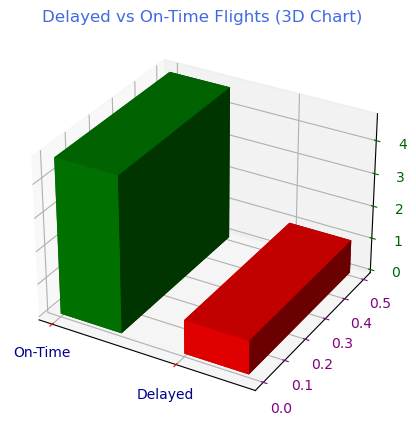

In [53]:
# The delay count is shown in a bar chart

values = df['DELAY_FLAG'].value_counts().sort_index()
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

# X positions (0 = on-time, 1 = delayed)
x = [0, 1]
y = [0, 0]
z = np.zeros(2)

dx = dy = [0.5, 0.5]
dz = values.values

colors = ['green', 'red']

ax.bar3d(x, y, z, dx, dy, dz, color=colors)

ax.tick_params(axis='x', colors='red')   
ax.tick_params(axis='y', colors='purple') 
ax.tick_params(axis='z', colors='darkgreen') 

ax.set_xticks([0, 1])
ax.set_xticklabels(['On-Time', 'Delayed'],color='darkblue')
ax.set_title("Delayed vs On-Time Flights (3D Chart)", color='royalblue')
plt.show()




<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Most flights are on-time, meaning the dataset is imbalanced.</li>

<li>Only a smaller portion of flights are delayed, usually around 15–20%.</li>

<li>This imbalance is important during model building because:

 <ul style="padding-left: 20px; margin-top: 5px;">
            <li>Accuracy alone is misleading.</li>
            <li>We must use F1-score, recall, or balanced accuracy.</li>
        </ul>
    </li>

<li>This graph gives a quick understanding of overall flight performance.</li>
</ul>
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Arrival Delay Boxplot
</div>

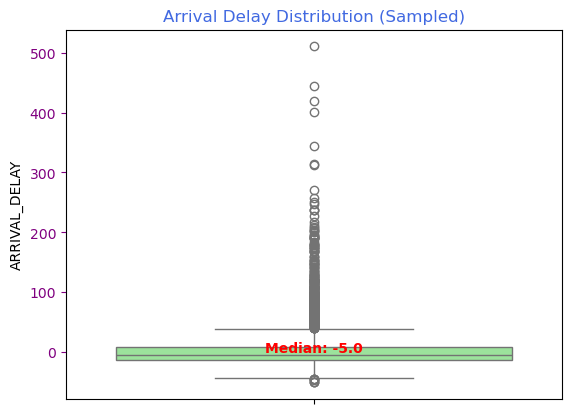

In [54]:
#Boxplot of Delays to see outliers

# Sample 5000 rows
sample_df = df[['ARRIVAL_DELAY']].dropna().sample(n=5000, random_state=42)

ax = sns.boxplot(data=sample_df, y='ARRIVAL_DELAY', color='lightgreen')

ax.tick_params(axis='y', colors='purple')  

plt.title("Arrival Delay Distribution (Sampled)", color='royalblue')

median_val = sample_df['ARRIVAL_DELAY'].median()
ax.text(0, median_val, f'Median: {median_val}', color='red', 
        ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>
<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Most flights arrive on time or with small delays.</li>

<li>The median arrival delay is low, showing good overall performance.</li>

<li>There are many outliers indicating some flights experience very high delays.</li>

<li>These extreme delays may be due to weather, congestion, or operational issues.</li>

</ul>
</div>



<div 
<span style="color:#003366;font-size:19px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Bivariate Analysis
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Delay % by Month (Seasonality Effect)
</div>

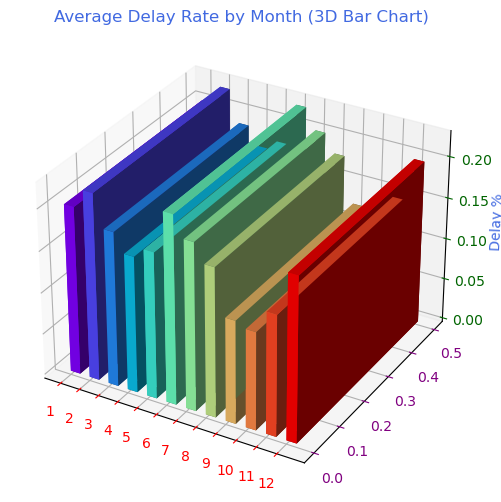

In [55]:
# Delays by Month

monthly_delay = df.groupby('MONTH')['DELAY_FLAG'].mean()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(monthly_delay))
y = np.zeros(len(monthly_delay))
z = np.zeros(len(monthly_delay))

dx = dy = 0.5
dz = monthly_delay.values

ax.tick_params(axis='x', colors='red')   
ax.tick_params(axis='y', colors='purple') 
ax.tick_params(axis='z', colors='darkgreen') 

colors = plt.cm.rainbow(np.linspace(0, 1, len(dz)))

ax.bar3d(x, y, z, dx, dy, dz, color=colors,shade=True)

ax.set_xticks(x)
ax.set_xticklabels(monthly_delay.index)
ax.set_title("Average Delay Rate by Month (3D Bar Chart)", color='royalblue')
ax.set_zlabel("Delay %",color='royalblue',labelpad=1.5)

plt.show()


<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Some months show a higher delay rate, indicating a seasonal trend.</li>

<li>Delay peaks may be due to:
    
<ul style="padding-left: 20px; margin-top: 5px;">
    
 <li>Monsoon season</li>

<li>Winter fog</li>

<li>Holiday travel rush</li>
</ul>
</li>

<li>Airlines can plan extra buffer time during high-delay months.</li>

<li>Travellers can avoid months that show a historically higher delay risk.</li>
</ul>
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Delay % by Day of Week
</div>

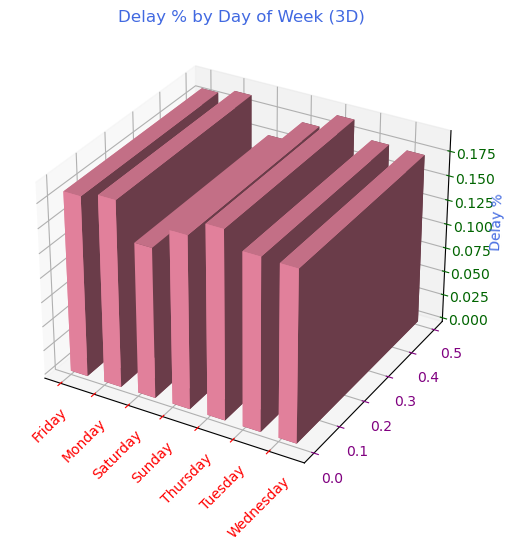

In [56]:
# Delays by Day of Week

day_delay = df.groupby('DAY_OF_WEEK')['DELAY_FLAG'].mean()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(day_delay))
y = np.zeros(len(day_delay))
z = np.zeros(len(day_delay))

dx = dy = 0.5
dz = day_delay.values

ax.tick_params(axis='x', colors='red')   
ax.tick_params(axis='y', colors='purple') 
ax.tick_params(axis='z', colors='darkgreen') 

ax.bar3d(x, y, z, dx, dy, dz, color='#FF91AF')

ax.set_xticks(x)
ax.set_xticklabels(day_delay.index, rotation=45)
ax.set_title("Delay % by Day of Week (3D)",color='royalblue')
ax.set_zlabel("Delay %",color='royalblue',labelpad=1.5)

plt.show()



<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Certain days (mostly weekends or Fridays) may show higher delays.</li>

<li>This usually happens due to:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>High passenger traffic</li>

<li>Scheduling congestion</li>
  
</ul>
</li>
<li>Useful for:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Airlines to optimize flight schedules</li>

<li>Customers to choose less risky travel days</li>
</ul>
</li>
</ul>
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Delay % by Time of Day (Morning/Afternoon/Evening/Night)
</div>

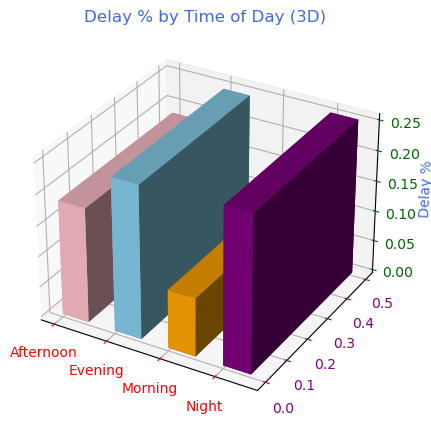

In [57]:
# Delays by Part of Day

part_delay = df.groupby('PART_OF_DAY')['DELAY_FLAG'].mean()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(part_delay))
y = np.zeros(len(part_delay))
z = np.zeros(len(part_delay))

dx = dy = 0.5
dz = part_delay.values

ax.tick_params(axis='x', colors='red')   
ax.tick_params(axis='y', colors='purple') 
ax.tick_params(axis='z', colors='darkgreen') 

colors = ['pink', 'skyblue', 'orange', 'purple']

ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True)

ax.set_xticks(x)
ax.set_xticklabels(part_delay.index)
ax.set_title("Delay % by Time of Day (3D)",color='royalblue')
ax.set_zlabel("Delay %", labelpad=1.5,color='royalblue')

plt.show()




<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">


<li>Evening and night flights may show higher delays.</li>

<li>Morning flights are usually more on-time because:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>First flights of the day have no previous delays backing up.</li>
</ul>
</li>

<li>Helps airports & airlines:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Allocate more staff in evening peaks</li>

<li>Improve ground management to reduce delays</li>
</ul>
</li>
</ul>
</div>

<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Route Analysis – Top 10 Busiest Routes
</div>

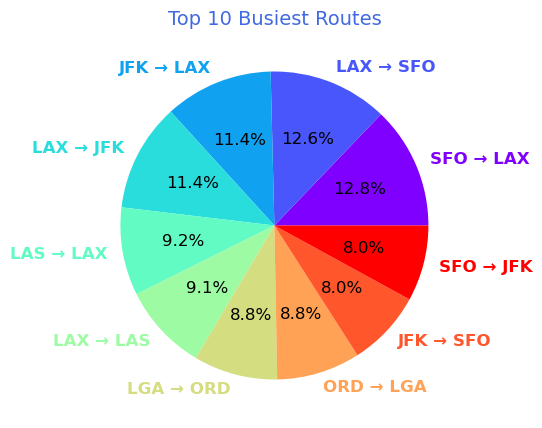

In [58]:
# Top 10 Busiest Routes

route_counts = df['ROUTE'].value_counts().head(10)

colors = plt.cm.rainbow(np.linspace(0, 1, len(route_counts)))

plt.figure(figsize=(7,5))

wedges, texts, autotexts = plt.pie(
    route_counts.values,
    labels=route_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize':12}
)

for text, color in zip(texts, colors):
    text.set_color(color)
    text.set_fontweight('bold')

plt.title("Top 10 Busiest Routes", color='royalblue', fontsize=14)
plt.show()




<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>The busiest routes indicate which city pairs have the highest traffic.</li>

<li>High traffic routes often correlate with:


<ul style="padding-left: 20px; margin-top: 5px;">

<li>More congestion</li>

<li>Higher delay probability</li>
</ul>
</li>

<li> Helpful for:

<ul style="padding-left: 20px; margin-top: 5px;">
    
<li>Identifying routes needing schedule optimization</li>

<li>Resource planning for airlines</li>
</ul>
</li>
</ul>
</div>


<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Taxi Time vs Arrival Delay
</div>

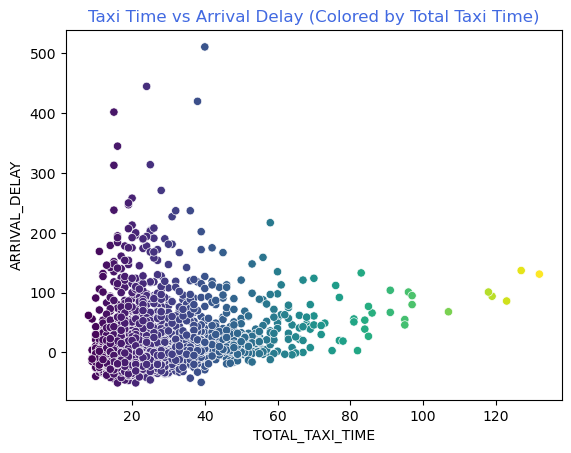

In [59]:
# Taxi Time vs Delay


# Sample 5000 rows
sample_df = df[['TOTAL_TAXI_TIME', 'ARRIVAL_DELAY']].dropna().sample(n=5000, random_state=42)

sns.scatterplot(
    data=sample_df,
    x='TOTAL_TAXI_TIME',
    y='ARRIVAL_DELAY',
    hue='TOTAL_TAXI_TIME',     
    palette='viridis',           
    legend=False                 
)

plt.title("Taxi Time vs Arrival Delay (Colored by Total Taxi Time)",color='royalblue')
plt.show()

<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">
    
<li>A clear relationship is visible:
<ul style="padding-left: 20px; margin-top: 5px;">
    
<li>Higher taxi time → higher arrival delay.</li>
</ul>
</li>

<li>Taxi time increases when:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Runways are busy</li>

<li>Airport traffic is heavy</li>

</ul>
</li>

<li>Taxi time is a strong predictor for delay in ML models.</li>
</ul>
</div>


<div 
<span style="color:#003366;font-size:19px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Multivariate
</div>


<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Top 10 Most Delayed Routes
</div>

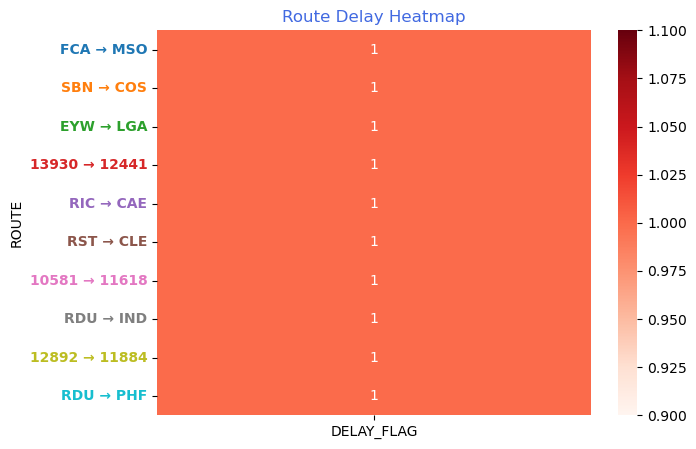

In [60]:
# Routes with Highest Delays

top_routes = df.groupby('ROUTE')['DELAY_FLAG'] \
                .mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,5))
ax = sns.heatmap(top_routes.to_frame(), annot=True, cmap='Reds')

plt.title("Route Delay Heatmap",color='royalblue')

plt.draw()

colors = list(mcolors.TABLEAU_COLORS.values())  
yticks = ax.get_yticklabels()

for i, tick in enumerate(yticks):
    tick.set_color(colors[i % len(colors)])
    tick.set_fontweight('bold')

plt.show()



<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Some routes show consistently high delay percentages.</li>

<li>These routes may have:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Busy airports</li>

<li>Weather issues</li>

<li>Airspace congestion</li>
</ul>
</li>

<li>Airlines can:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Investigate causes</li>

<li>Adjust flight frequency</li>

<li>Improve buffer timings</li>
</ul>
</li>

</ul>
</div>


<div style="color:#003366; font-size:17px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Correlation Heatmap
</div>

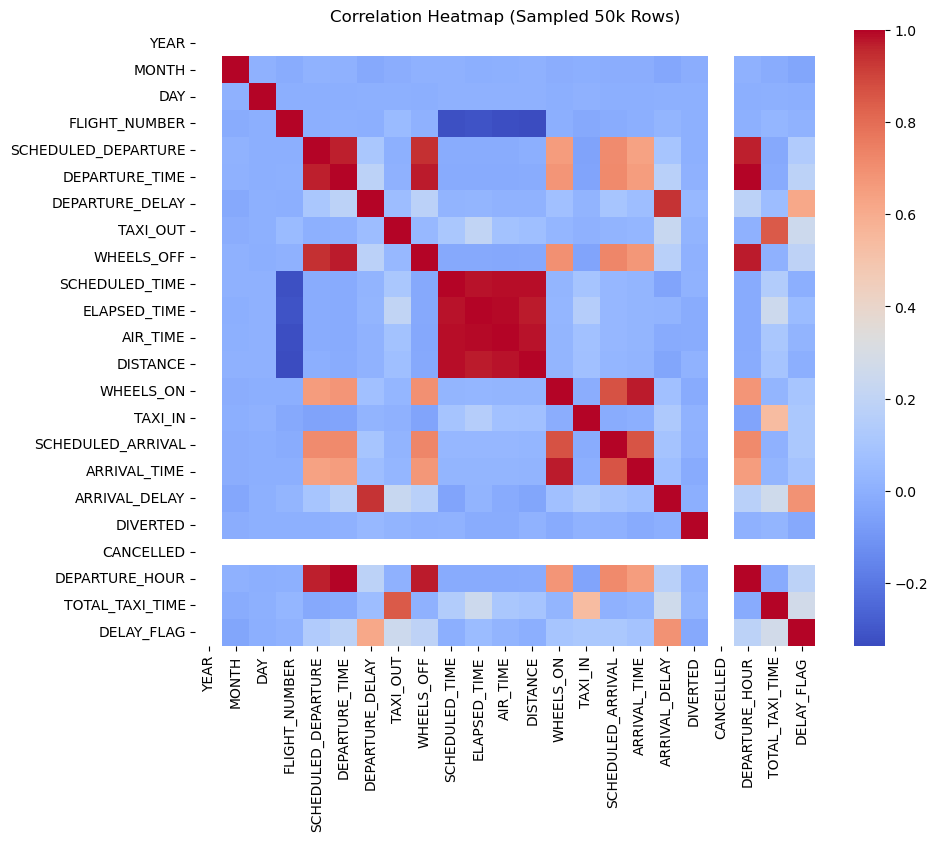

In [61]:
# Correlation Heatmap

# Sample only 50,000 rows for correlation
sample_df = df.sample(n=50000, random_state=42)

corr = sample_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Sampled 50k Rows)")
plt.show()




<div style="color:#003366; font-size:15px; font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">
Insight
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color: #333333;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px ;
    border-radius: 6px;
">
<ul style="margin: 0; padding-left: 20px;">

<li>Correlation highlights which numerical features are strongly related.</li>

<li>Example useful relationships:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Arrival delay ↔ Departure delay</li>

<li>Taxi-in/out time ↔ Arrival delay</li>

</ul>
</li>

<li>Helps feature engineering:

<ul style="padding-left: 20px; margin-top: 5px;">

<li>Remove highly correlated variables</li>

<li>Keep useful predictors for modeling</li>

</ul>
</li>
</ul></div>


<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Key Findings
</div>



<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Overall Delay Performance:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>A noticeable portion of flights experienced delays, especially during peak operational periods.</li>
<li>Arrival delays strongly depend on departure delays, showing that once a delay begins, it tends to propagate through the system.</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Time-Based Delay Patterns:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>Monthly Trend: Delay percentages increased during certain months, particularly during monsoon and holiday seasons.</li>
<li>Time of Day: Afternoon and evening flights showed higher delays compared to early morning flights.</li>
<li>Day of Week: Monday and Friday had higher delay rates, likely due to heavy business travel demand.</li>

</ul>


<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Route Analysis:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>The busiest routes handled a major share of total flights, indicating heavy traffic congestion.</li>
<li>Some specific routes consistently appeared among the top 10 most delayed, suggesting operational challenges on those routes (weather, airport capacity, or traffic load).</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Taxi-Time Impact on Delays:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>Longer taxi-out times were associated with higher departure delays.</li>
</li>3D scatter analysis confirmed that:
<ul style="padding-left: 20px; margin-top: 5px;">
<li>Taxi-Out Time → Departure Delay → Arrival Delay
forms a chain-reaction effect.</li>
</ul>
</li>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Correlation Insights:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>Strong correlation found between:
<ul style="padding-left: 20px; margin-top: 5px;">
<li>Departure Delay and Arrival Delay</li>
<li>Taxi-Out Time and Departure Delay</li>
</ul>
</li>
<li>Other numeric variables showed weak or negligible correlation with delays.</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Outlier Behavior:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>Arrival delay distribution contained many extreme outliers, indicating that some flights experienced very high delays (several hours).</li>
<li>The median delay value provides a more reliable picture than the mean.</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣
Overall Conclusion:</span><br>
<ul style="margin: 0; padding-left: 20px;">
<li>Flight delays are mainly influenced by:
<ul style="padding-left: 20px; margin-top: 5px;">
<li>Congestion (ground and air)</li>
<li>Peak-hour scheduling</li>
<li>Seasonal weather changes</li>
<li>High-traffic routes</li>
</ul>
</li>
<li>Improvements in scheduling, route management, and airport operations could reduce these delays.</li>  
    
</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Conclusion
</div>



<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
<p>In this project, I analyzed different factors that affect flight delays using exploratory data analysis. The visualizations helped me understand how delays vary across time, routes, and operations. From the patterns observed, it is clear that flight delays are not random—they follow specific trends. </p>
<p>I found that delays increase during certain months, especially during peak travel seasons. Time of day also has a strong influence, with evening and night flights showing more delays compared to morning flights. Taxi-out time and departure delay are strongly related, which means longer ground congestion leads to further delays.</p>
<p>Some routes are much busier and therefore face more traffic-related delays. The correlation heatmap shows important relationships between delay features, helping identify which factors impact arrival delays the most.</p>
<p>Overall, the project shows that delays are mainly caused by peak season traffic, busy routes, late departures, and long taxi-out times. Understanding these patterns can help airlines improve scheduling and reduce delay rates in the future.</p>

</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Recommendations
</div>





<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Optimize Airport Ground Operations:</span><br>
Airports should implement better scheduling of taxiways, gates, and runway usage to reduce congestion during peak hours.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Increase Ground Staff During Peak Hours:</span><br>
Additional staff for boarding, deboarding, baggage handling, and ground operations can help reduce taxi and turnaround times.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Improve Flight Scheduling:</span><br>
Airlines should carefully plan departure and arrival slots, especially for evening and night flights, to minimize delays caused by traffic congestion.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Monitor and Minimize Taxi Times:</span><br>
Reducing taxi-in and taxi-out times can significantly improve on-time performance. Airlines should coordinate with airports to avoid unnecessary ground waiting.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Enhance Delay Prediction Models:</span><br>
Integrate historical delay patterns with real-time weather and air traffic data to anticipate potential delays and inform passengers proactively.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Focus on High-Risk Routes:</span><br>
Routes identified with consistently higher delays should be monitored closely, and contingency plans should be implemented to avoid recurring delays.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Continuous Data Collection & Analysis:</span><br>
Regularly updating datasets and monitoring key performance metrics will allow airports and airlines to implement timely improvements and measure impact.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Enhance Aircraft Maintenance and Weather Monitoring:</span><br>
Regular aircraft maintenance and proactive monitoring of weather conditions can help prevent delays caused by technical issues or adverse weather.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Improve Communication with Passengers:</span><br>
Providing timely updates about delays, estimated departure/arrival times, and alternative arrangements improves passenger experience and reduces frustration during disruptions.

</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Limitations of the Project
</div>



<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Incomplete Feature Set:</span> <br>
The dataset lacks several important factors such as weather conditions, air traffic density, operational issues, and crew availability, which limits the depth of the analysis.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Time-Period Restriction:</span><br>
The analysis is based on data from a specific period. Therefore, long-term seasonal or year-to-year patterns cannot be generalized.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Data Quality Challenges:</span> <br>
The dataset contains missing values, outliers, and inconsistencies. Although cleaning was performed, such issues can still influence the accuracy of the findings.
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Memory and Computational Limitations:</span> <br>
Due to the large size of the dataset, some advanced visualizations and full-scale analyses had to be sampled or simplified to avoid memory errors.
  
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Lack of Real-Time Information:</span><br>
The project uses only historical records. As a result, the study does not include real-time delay predictions or dynamic modeling.

</div>

<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ Future Work
</div>



    

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Machine Learning Models:</span> <br>
Building predictive models to forecast flight delays based on historical data and engineered features.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Real-Time Prediction System::</span> <br>
Developing a system that can provide real-time delay predictions to airlines and passengers.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Expansion to More Airports:</span> <br>
Including additional airports and routes to improve the generalizability of the analysis.

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Integration of Weather and Air Traffic Data:</span> <br>
Adding weather conditions, air traffic information, and other external factors to enhance the accuracy of delay predictions.

</div>


<div 
<span style="color:#003366;font-size:24px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">◇ References
</div>

<div style="
    font-size: 14px;
    line-height: 1.6;
    text-align: justify;
    color:#333333;;
    background: #f7f7f7;
    padding: 15px 20px;
    border-left: 6px  ;
    border-radius: 6px;
">
 
<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Dataset Source:</span> <br>
<li>Flight delays dataset: Kaggle – US DOT Flight Delays</li>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Tools & Libraries:</span> <br>
<ul style="padding-left: 20px; margin-top: 5px;">
<li>Python: pandas, numpy, matplotlib, seaborn</li>
<li>Jupyter Notebook</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Websites / Documentation:</span> <br>
<ul style="padding-left: 20px; margin-top: 5px;">
<li>andas Documentation</li>

<li>Seaborn Documentation</li>

<li>Matplotlib 3D plotting guide</li>
</ul>

<span style="color:#003366;font-size:17px;font-weight:bold; text-shadow:2px 2px 4px #ADD8E6;">➣ Additional References:</span> <br>
<li>Articles/tutorials on airline delay analysis, EDA, and feature engineering</li>
</div>